In [1]:
from bs4 import  BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import squarify

In [16]:
#Scrape the "Current State of the Race" table (first table) from the NYT webpage
html = urlopen("https://www.nytimes.com/interactive/2020/us/elections/democratic-polls.html")
soup = BeautifulSoup(html)
table=soup.find("table",{"class":"g-candidates-table g-sortable-table"})
rows = table.find_all("tr")
col =[var.text.replace("\n\n\n\n\n","").replace("\n\n","").replace("* ","").replace(".†","") for var in rows[0].find_all('th')]

df=pd.DataFrame()

for i in range(1,len(rows)-1):
    values =[var.text.replace("\n\n\n\n\n\n\n","").replace("\n\n","").replace("\n\n\n\n\n\n","")\
             .replace("\n\n\n","").replace("\n","") for var in rows[i].find_all('td')]
             
    df = df.append(pd.Series(values),ignore_index=True)
    
df.columns = col
df.columns = ["Qualified for the November debate","National Polling Average", "Individual Contributions",\
              "Weekly News Coverage"]
name = ["Joseph R. Biden","Elizabeth Warren","Bernie Sanders","Pete Buttigieg","Kamala Harris","Amy Klobuchar"\
       ,"Andrew Yang","Tulsi Gabbard","Cory Booker","Tom Steyer","Julián Castro","Marianne Williamson","Michael Bennet"\
       ,"Steve Bullock","John Delaney","Wayne Messam","Joe Sestak"]

for i in range(17):
    df.iloc[i,0] = name[i]

df

,Qualified for the November debate,National Polling Average,Individual Contributions,Weekly News Coverage
0,Joseph R. Biden,26%,$37.6m,#1
1,Elizabeth Warren,21%,$49.8m,#2
2,Bernie Sanders,14%,$61.5m,#3
3,Pete Buttigieg,8%,$51.5m,#5
4,Kamala Harris,4%,$35.5m,#6
5,Amy Klobuchar,2%,$13.9m,#7
6,Andrew Yang,2%,$15.1m,#11
7,Tulsi Gabbard,2%,$6.5m,#4
8,Cory Booker,1%,$15.5m,#9
9,Tom Steyer,< 1%,$2.0m,#8


In [17]:
#Clean the scrapped data to make sure that the all the variables 
#("National Polling Average", "Individual Contributions", "Weekly News Coverage") are numeric.

df["National Polling Average"] = df["National Polling Average"].str.replace("%","").str.replace("< 1","1")#get rid of comma
df["Individual Contributions"] =df["Individual Contributions"].str.replace("$","").str.replace("m","").str.replace("<","")
df["Weekly News Coverage"] =df["Weekly News Coverage"].str.replace("#","")

df["National Polling Average"] = pd.to_numeric(df["National Polling Average"])
df["Individual Contributions"] = pd.to_numeric(df["Individual Contributions"])
df["Weekly News Coverage"] = pd.to_numeric(df["Weekly News Coverage"])

df

,Qualified for the November debate,National Polling Average,Individual Contributions,Weekly News Coverage
0,Joseph R. Biden,26,37.6,1
1,Elizabeth Warren,21,49.8,2
2,Bernie Sanders,14,61.5,3
3,Pete Buttigieg,8,51.5,5
4,Kamala Harris,4,35.5,6
5,Amy Klobuchar,2,13.9,7
6,Andrew Yang,2,15.1,11
7,Tulsi Gabbard,2,6.5,4
8,Cory Booker,1,15.5,9
9,Tom Steyer,1,2.0,8


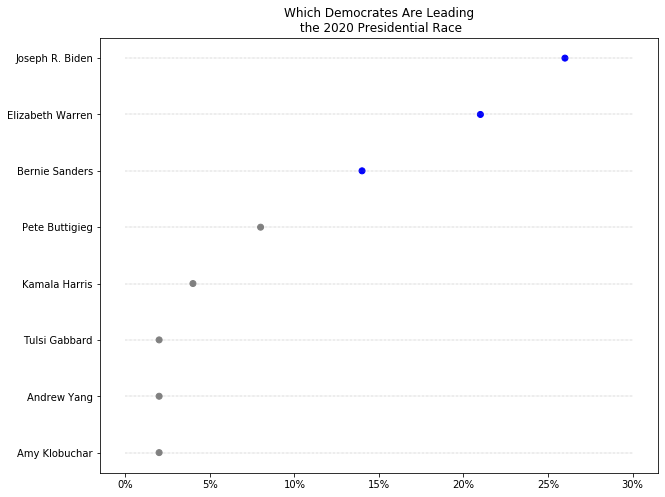

In [18]:
#Create a dot plot that shows the top candidates who have more than 2%
#support. (Please note that your graph might not look exactly the same in case NYT
#updated the polls before next week)

def color(x):
    if x > 10:
        return "blue"
    else:
        return "grey"
df["color"]= df["National Polling Average"].apply(color)

df_scat = df[df["National Polling Average"]>=2]
df_scat=df_scat.sort_values("National Polling Average")
plt.figure(figsize=(10,8))
plt.scatter("National Polling Average","Qualified for the November debate", data=df_scat,color=df_scat.color,marker="o")

ax = plt.gca()
ax.hlines(df_scat["Qualified for the November debate"],
         xmin=0,xmax=30,
         linestyle='-.',color='grey',alpha=0.7,
         linewidth=0.4)

ax.set_xticklabels([str(i) + '%' for i in np.arange(-5,31,5)])

plt.title("Which Democrates Are Leading\n the 2020 Presidential Race")

plt.show()

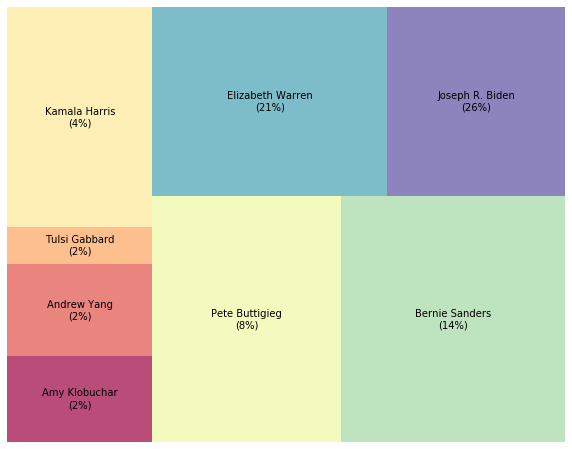

In [22]:
#Create a tree map as follows. The percentage for each candidate is out of the
#total money received by the candidates who has at least 2% polling average

labels = df_scat[["Qualified for the November debate","National Polling Average"]]\
.apply(lambda x:str(x[0])+'\n'+'(' +str(x[1])+"%"+')',axis=1)
colors = plt.get_cmap('Spectral')(np.linspace(0,1,len(labels)))

plt.figure(figsize=(10,8))
squarify.plot(sizes = df_scat["Individual Contributions"].round(),label=labels,color=colors,alpha=0.7)
plt.axis('off')
plt.show()